**Dataset  Description:** Insurance Dataset

This dataset contains demographic and medical information about patients, along with their respective insurance claim amounts. It is used to predict the insurance claim cost using an Artificial Neural Network (ANN).

**Objective**

To build a machine learning model (ANN) that accurately predicts the insurance claim amount based on the patient’s demographic and health-related features.

**Attributes**

* **PatientID** Unique identifier for each  
* **patient**(used only for reference, not for training).

* **bloodpress** Blood pressure level (systolic).

*  **bmi** Body Mass Index, a measure of body fat based on height and weight.

*   **claim** Target Variable – Medical insurance claim amount (in dollars).
*   **region** Residential region in the U.S. (southeast, southwest, northeast, northwest).
*   **smoker** Whether the patient smokes (Yes/No).
*  **children** Number of children/dependents covered under the insurance policy.  


*  **age** Age of the patient (in years).
* **gender** Biological sex of the patient (Male/Female).
   



















Importing the required Libraries

*   Numpy
*   Pandas
*   sklearn


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("insurance_data.csv")

In [4]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39,Male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24,Male,30.1,87,No,0,No,southeast,1131.51
2,7,8,19,Male,41.1,100,No,0,No,northwest,1146.80
3,8,9,20,Male,43.0,86,No,0,No,northwest,1149.40
4,9,10,30,Male,53.1,97,No,0,No,northwest,1163.46


**Performing EDA**

No Null Values



In [5]:
print(df.isnull().sum())


index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64


**Exploratory Data Analysis**
*  These insights helped guide preprocessing decisions like dropping irrelevant features, encoding categorical variables, and scaling numerical features.

* Claim amounts were highly right-skewed, with most claims being small and a few very high values. This supported converting claim into a binary target (high_claim > 10000) for classification.
Children had a right-skewed distribution — most individuals had 0 or 1 child.

*   Blood pressure was slightly right-skewed, with some high outliers above 130.


*   BMI showed a near-normal distribution centered around 30, suggesting slightly overweight individuals.


*   Age was fairly uniformly distributed across the dataset.


*   Identifiers (index, PatientID) were uniformly distributed and dropped as they carry no predictive value.















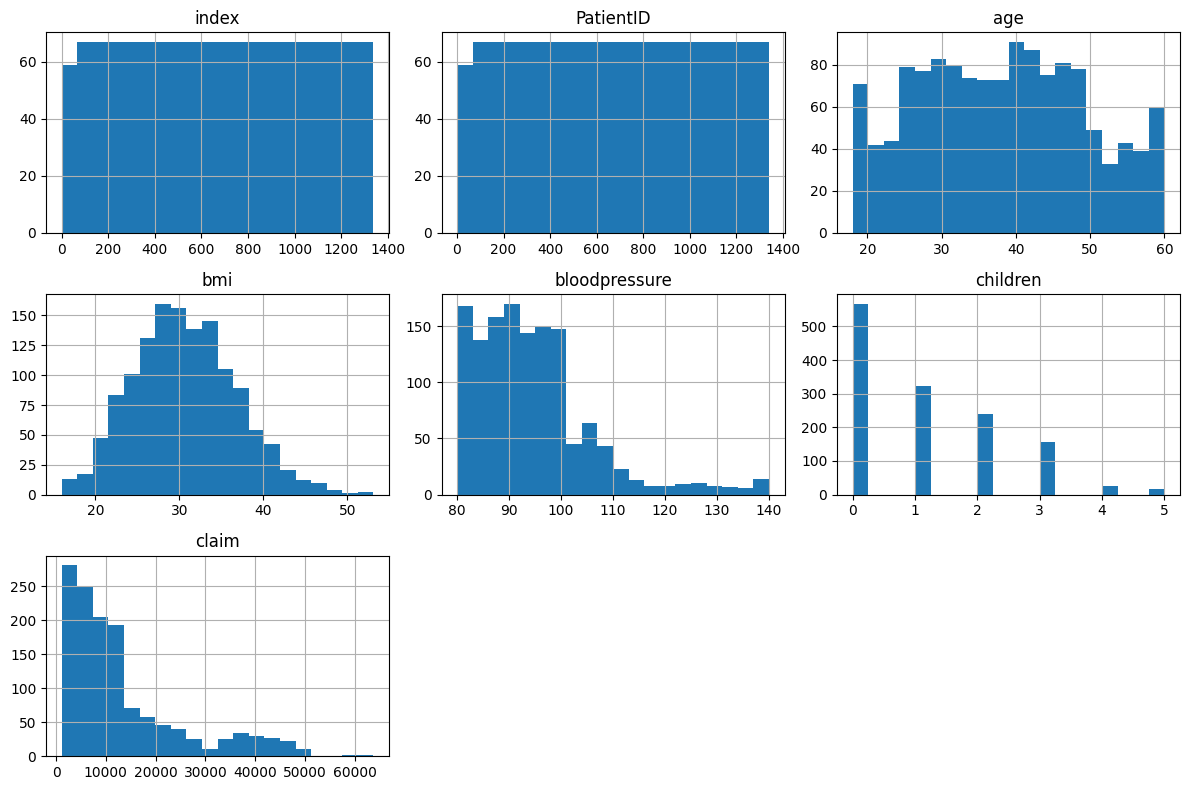

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for numerical features
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


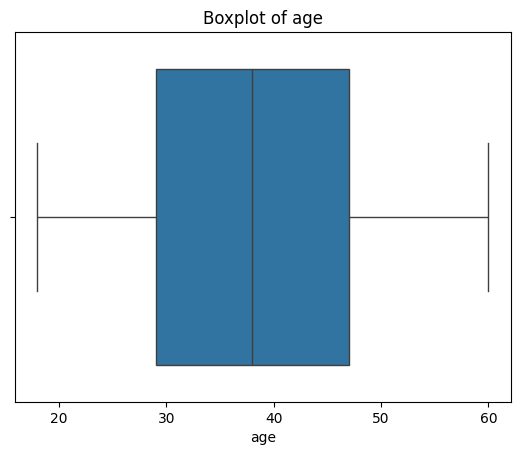

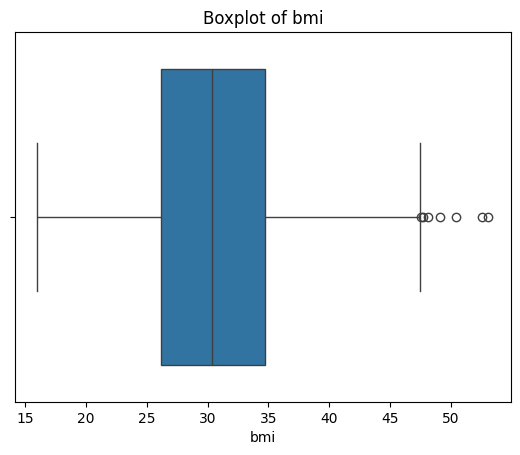

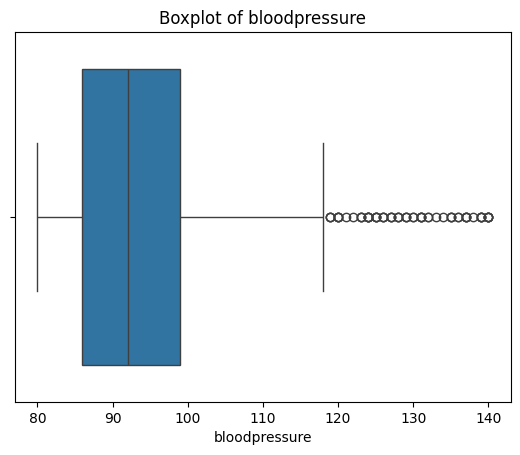

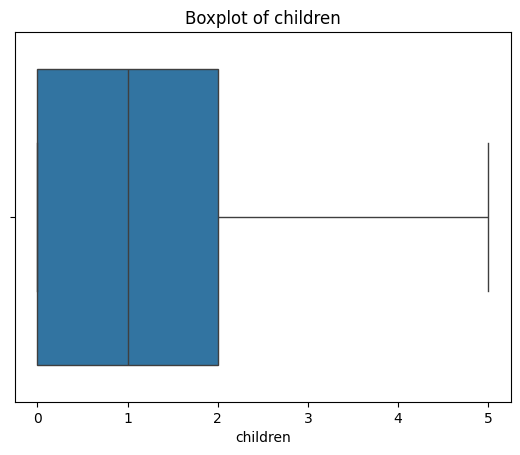

In [9]:
for col in ['age', 'bmi', 'bloodpressure', 'children']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**1. Preprocessing**


*  Drop irrelevant columns: index, PatientID, and original claim.

*  Encode categorical variables (gender, diabetic, smoker, region) using LabelEncoder.

*  Normalize all numerical features using StandardScaler.
* Split into training and testing sets (80/20 split).













In [11]:
df['high_claim'] = (df['claim'] > 10000).astype(int)

Dropping of unecessary Columns

In [12]:
df = df.drop(columns=['index', 'PatientID', 'claim'])

In [13]:
categorical_cols = ['gender', 'diabetic', 'smoker', 'region']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

In [14]:
X = df.drop('high_claim', axis=1).values
y = df['high_claim'].values

Normalizing and Standardizing the Data


In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Training and spliting of Dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2. Perceptron Learning Rule Implementation**

A custom Perceptron class was created with three activation functions:


* **step:** Classic Perceptron activation (0 or 1)


*  **tanh:** Similar to sigmoid but output ranges from -1 to 1 (zero-centered)

*   **sigmoid:** Smooth S-curve, better for gradient-based updates


**The model:**


*  Initializes weights and bias to zero


*   Iteratively updates weights using the Perceptron learning rule
*   Optionally tracks loss for sigmoid and tanh activations










**3. Training and Evaluation**
Accuracy was measured on the test set

**Resulting accuracies:**




*   **Step**	68.91%

*   **Tanh**	77.53%
*   **Sigmoid**	74.91%








In [36]:
# --- Perceptron Class ---
class Perceptron:
    def __init__(self, activation='step', learning_rate=0.01, epochs=1000):
        self.activation = activation
        self.lr = learning_rate
        self.epochs = epochs

    def _activate(self, x):
        if self.activation == 'step':
            return np.where(x >= 0, 1, 0)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'tanh':
            return np.tanh(x)
        else:
            raise ValueError("Unknown activation function")

    def _activation_derivative(self, output):
        if self.activation == 'sigmoid':
            return output * (1 - output)
        elif self.activation == 'tanh':
            return 1 - output ** 2
        else:
            return 1  # Step function

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights) + self.bias
                output = self._activate(z)
                if self.activation in ['sigmoid', 'tanh']:
                    error = target - output
                    update = self.lr * error * self._activation_derivative(output)
                else:  # step
                    update = self.lr * (target - output)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        output = self._activate(z)
        if self.activation in ['sigmoid', 'tanh']:
            return np.where(output >= 0.5, 1, 0)
        return output

# Try different activation functions
for activation in ['step', 'sigmoid', 'tanh']:
    model = Perceptron(activation=activation, learning_rate=0.01, epochs=1000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Accuracy with {activation} activation: {acc:.4f}")


Accuracy with step activation: 0.6891
Accuracy with sigmoid activation: 0.7491
Accuracy with tanh activation: 0.7753


**Confusion Matrix**

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[132   7]
 [ 53  75]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       139
           1       0.91      0.59      0.71       128

    accuracy                           0.78       267
   macro avg       0.81      0.77      0.76       267
weighted avg       0.81      0.78      0.77       267



In [37]:
class Perceptron:
    def __init__(self, activation='sigmoid', learning_rate=0.01, epochs=1000):
        self.activation = activation
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []

    def _activate(self, x):
        if self.activation == 'step':
            return np.where(x >= 0, 1, 0)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'tanh':
            return np.tanh(x)

    def _activation_derivative(self, output):
        if self.activation == 'sigmoid':
            return output * (1 - output)
        elif self.activation == 'tanh':
            return 1 - output ** 2
        else:
            return 1  # not used in step

    def _loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)  # MSE for simplicity

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.loss_history = []

        for _ in range(self.epochs):
            total_loss = 0
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights) + self.bias
                output = self._activate(z)
                error = target - output

                if self.activation in ['sigmoid', 'tanh']:
                    update = self.lr * error * self._activation_derivative(output)
                else:
                    update = self.lr * error

                self.weights += update * xi
                self.bias += update

                total_loss += (error ** 2)

            self.loss_history.append(total_loss / len(X))

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        output = self._activate(z)
        return np.where(output >= 0.5, 1, 0)


**4. Loss Curve Plotting**

For sigmoid and tanh activations, the mean squared error (MSE) was tracked at each epoch and plotted to visualize convergence

This shows how quickly and how well the model is learning.

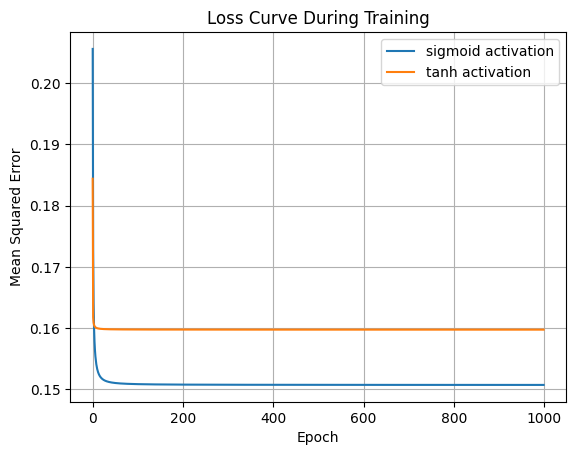

In [38]:
import matplotlib.pyplot as plt

# Train and plot for sigmoid and tanh
for activation in ['sigmoid', 'tanh']:
    model = Perceptron(activation=activation, learning_rate=0.01, epochs=1000)
    model.fit(X_train, y_train)

    # Plot the loss curve
    plt.plot(model.loss_history, label=f'{activation} activation')

plt.title("Loss Curve During Training")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()


**Summary**

* A real-world insurance dataset was  adapted into a binary classification problem

*   Perceptron models with different activation functions were tested.

*   Tanh activation gave the best accuracy.

*  Loss curves confirmed better learning dynamics with smoother activation functions.






.




